# ReadMe
 
I targeted the ptt article (https://www.ptt.cc/man/Tech_Job/D207/D23A/index.html) as my HW.




In [ ]:
!pip install beautifulsoup4
#!pip install urllib
!pip install requests

In [ ]:
import urllib.request as req

- ctrl+u 原始碼
- F12開發人員工具 -> network -> refresh -> index.html -> headers -> request.headers -> user- agent



In [ ]:
url = 'https://www.ptt.cc/man/Tech_Job/D207/D23A/index.html'

#建立request物件，附加headers資訊，模仿成user， 流程如markdown
request = req.Request(url, headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
})

with req.urlopen(request) as response:
  data =response.read().decode('utf-8')
#print(data)

In [ ]:
#用bs4爬靜態網頁
from bs4 import BeautifulSoup
web = BeautifulSoup(data,'html.parser')
# print(web.title.string) # title string

titles = web.find_all("div", class_ = "title")
#find the div label in the class= "title" 



In [ ]:
def html_cleaner(x):
  output = []
  if x.a != None:
    output.append(x.a.string)
  return output  

output = list(map(html_cleaner,titles))
print(output)

[['◆ [請益] 外商公司的工作'], ['◆ [心得]是不是學歷不好 就一輩子進不了好外商'], ['◆ 國外薪資稅率計算'], ['◇ [問題] 對於約聘職的迷思'], ['◆ [問題] 外商的股票選擇權'], ['◆ [請益] 這樣到底該不該留在日本?'], ['◇ Re: [討論] 三星的聘書'], ['◆ [請益] 關於日商公司'], ['◇ Re: [請益] 人生OFFER選擇(印尼工作)'], ['◆ [請益] 外商公司真的比較好嗎?'], ['◇ Fw: [新聞] 頂尖科技公司起薪：NVIDIA最高 蘋果倒數'], ['◆ [請益] 進入外商的資格？'], ['◇ [轉錄]外商來台設立研發中心, 還要政府補助?  '], ['◇ [新聞] 德國藍卡招攬外國專才'], ['◇ [討論] 分辨真假外商'], ['◇ [請益] 到巴西的機會'], ['◇ Re: [請益] 到巴西的機會'], ['◆ 美國 工作稅率'], ['◇ [心得] 一些外商面試經驗分享'], ['◇ [心得] 外商工作文化'], ['◇ [心得] 國外公司與國內傳產的開會狀況~'], ['◆ [請益] 駐美RMA 這樣薪水夠在美國生活嗎?'], ['◇ [心得] 一年來的外商面試經驗'], ['◇ Re: [請益] 外商疑問'], ['◆ [請益] 外商疑問'], ['◇ Re: [請益] 外商IC豬屎屋年薪'], ['◆ [請益] 獵人找去英國工作'], ['◆ [心得] 外商     薪水(5)'], ['◆ [討論] 如果你有機會到國外去工作'], ['◇ [請益] 本土傳產業務 轉 外商業務'], ['◇ Re: [請益] 本土傳產業務 轉 外商業務'], ['◆ [請益] 外商回不去台商？'], ['◇ [分享] 外商工作心得'], ['◇ [討論] 關於外商的ESPP/RSU'], ['◆ [心得] 討厭中國所以想離開外商'], ['◆ [請益] 長駐美國一年給200萬多嗎'], ['◆ [請益] 請問什麼是假外商？'], ['◇ Re: [徵才] 日本綜合製造商 旭化成總部年度海外徵才'], ['◇ [面試] 美國科技公司面試分類'], ['◆ [請益] 美國 vs 臺灣'], ['◇ [心得] 日商外商軟體工程師薪資分享'], ['◇ [心得] 這幾年在台的日商'

### Step 4: Analyze the data

In [ ]:
text_summary = ''
for item in output:
  text_summary = text_summary+ str(item)

In [ ]:
import jieba #中文斷字
words = jieba.lcut(text_summary)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.257 seconds.
Prefix dict has been built successfully.


# 去除自定義停用字

In [ ]:
stopwords = ['的','◇','[','◆','?',']','?','+','-','*',':',"'"," ","/","，","了","!","(","...", "Re"] #隨便定了一些停用辭
words_noSW = [sub for sub in words if (sub not in stopwords and len(sub)>1)] 

In [ ]:
# counts = {}
# for word in words_noSW:  
#   counts[word] = counts.get(word,0) + 1

# items = list(counts.items())  
# items.sort(key=lambda x:x[1], reverse=True)
# items[1:20]

# matplot不能直接print 中文 ，修改一下

In [ ]:
import matplotlib

# 找出套件安裝位置
print(matplotlib.__file__)

# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from nltk import FreqDist #做wordcount
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
--2022-02-28 10:03:48--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.1.206, 2607:f8b0:4004:801::200e
Connecting to drive.google.com (drive.google.com)|172.217.1.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i6486s8c50i4mt34eutsgtpcrc77dgf9/1646042625000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-02-28 10:03:53--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i6486s8c50i4mt34eutsgtpcrc77dgf9/1646042625000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.73.225, 2607:f8b0:4004:c07::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc

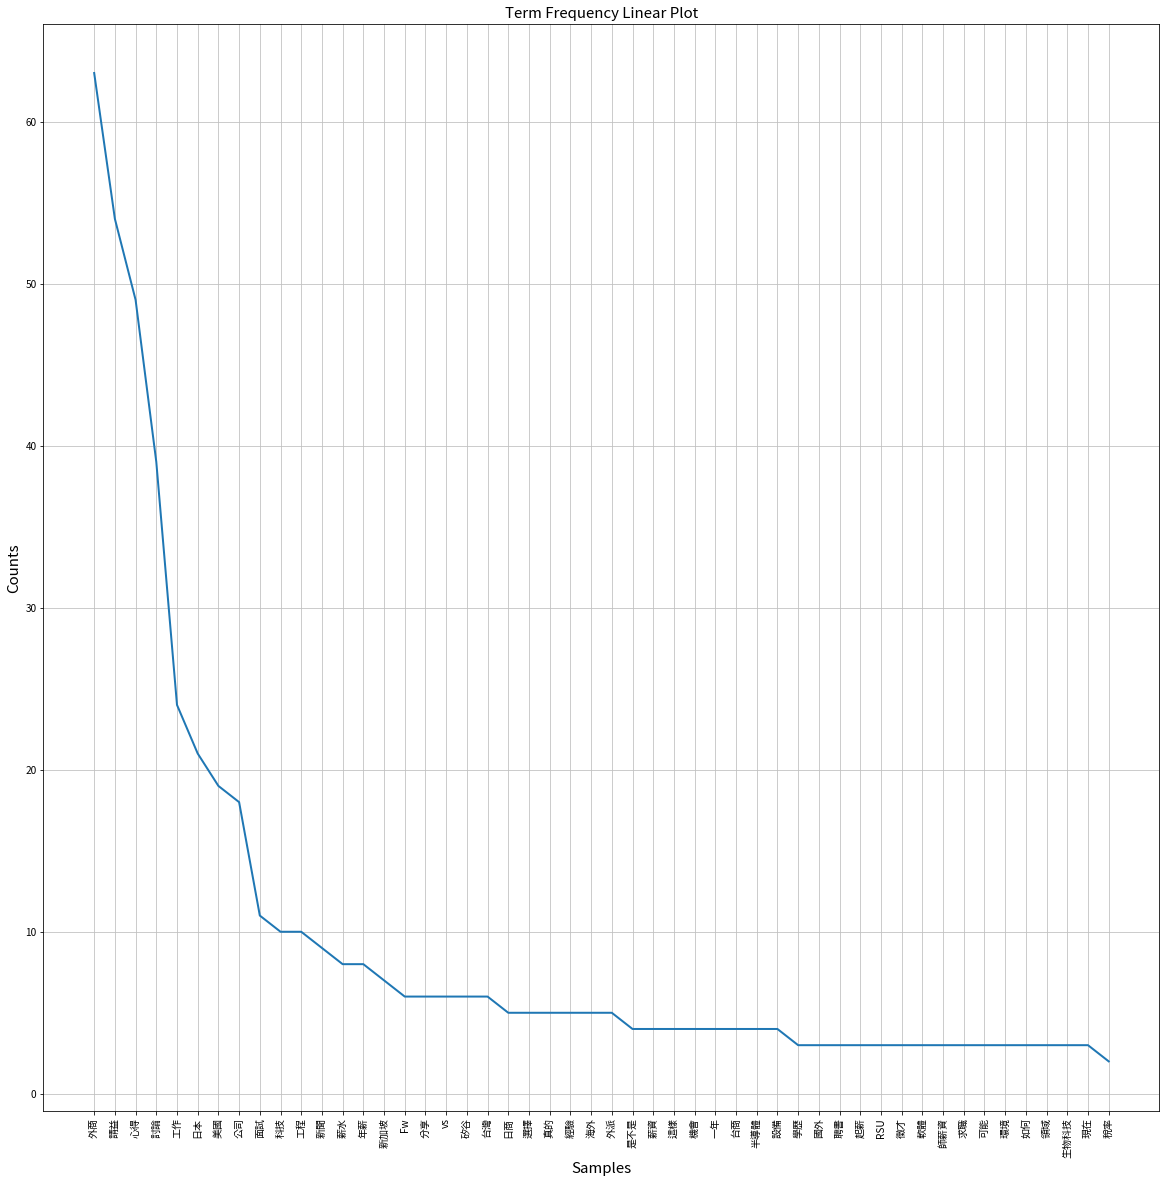

In [ ]:
plt.figure(figsize=(20, 20)) 
parameters = {'axes.labelsize': 15,'axes.titlesize': 15}
plt.rcParams.update(parameters)

fdist1 = FreqDist(words_noSW)
plt.title("Term Frequency Linear Plot") 
plt.ylabel("Count") 
plt.xlabel("Word")
fdist1.plot(50, cumulative=False) #列出前50個就好


# What I found
No surprizely, the article categories like '請益', '心得' , '討論', '工作', '情報', '新聞' ,'面試' rank pretty high in the frontier of the chart.

Therefore, I add them into the stopword for the following plot.
And then, i wnat to knowwhaat word play the biggest portion in the whole file valid counting after the filtering.

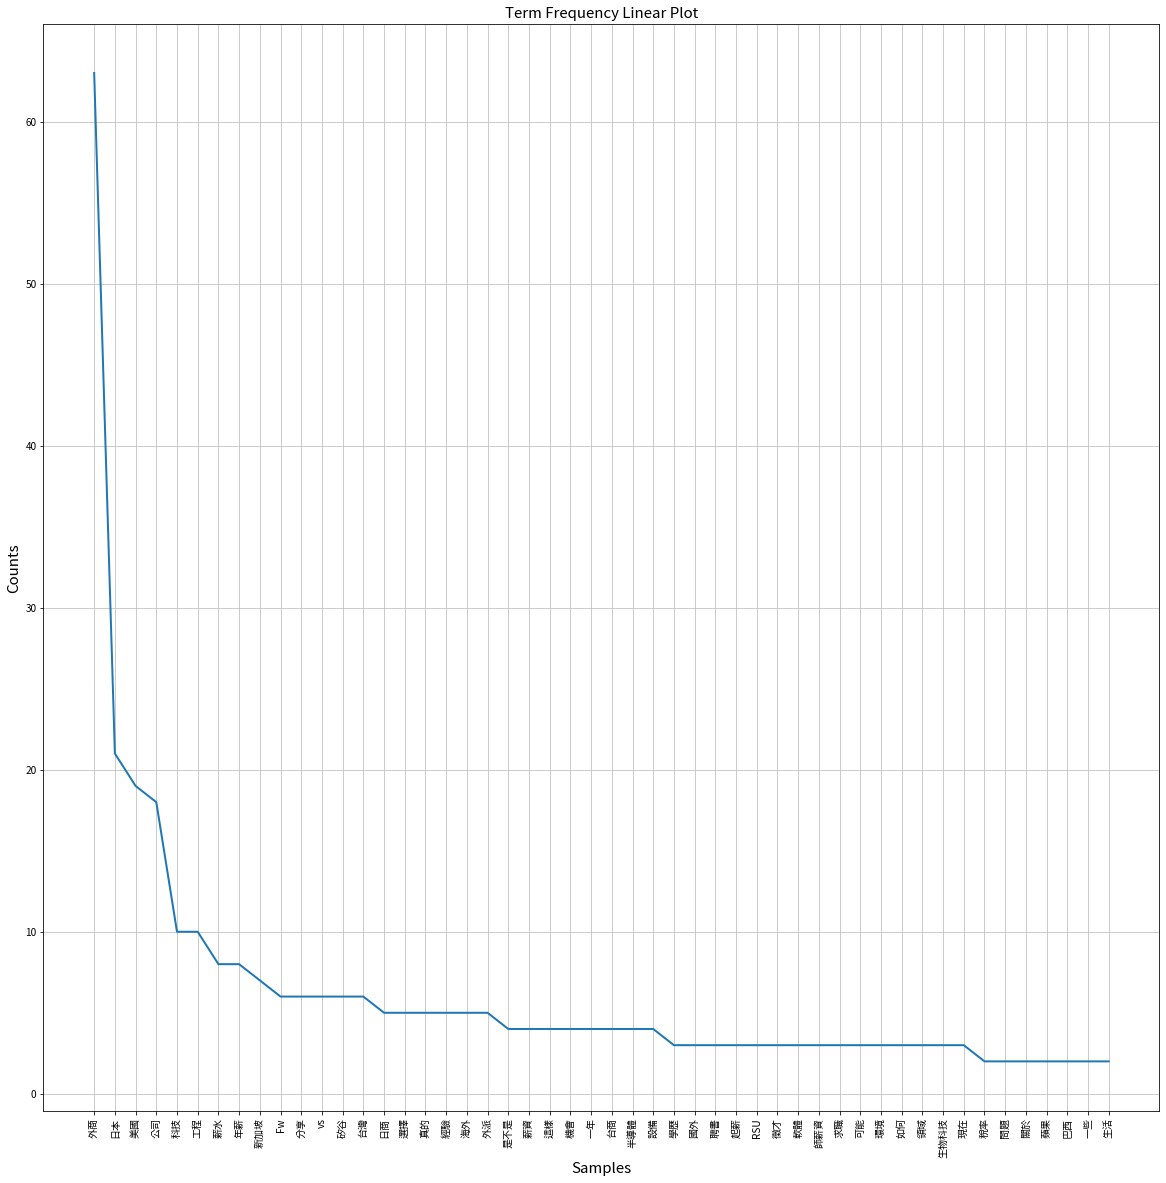

In [ ]:
#Filter out the categorical label
categorical_title = [ '請益', '心得' , '討論', '工作', '情報', '新聞' ,'面試']
new_stopwords = stopwords +categorical_title

words_noSW_noLabel = [sub for sub in words if (sub not in new_stopwords and len(sub)>1)] 

plt.figure(figsize=(20, 20)) 
parameters = {'axes.labelsize': 15,'axes.titlesize': 15}
plt.rcParams.update(parameters)

fdist1 = FreqDist(words_noSW_noLabel)
plt.title("Term Frequency Linear Plot") 
plt.ylabel("Count") 
plt.xlabel("Word")
fdist1.plot(50, cumulative=False) #列出前50個就好

In [ ]:
def add(x,y):            # 兩數相加
  return x + y

counts = {}
for word in words_noSW_noLabel:  
  counts[word] = counts.get(word,0) + 1

items = list(counts.items())  
items.sort(key=lambda x:x[1], reverse=True)

import pandas as pd
df = pd.DataFrame(items, columns =['term', 'count'])
total_count = sum(df['count'])

Proportion = list(map(lambda x: (x[0] , round((x[1]/total_count),4)),items))
Proportion[0:9]

[('外商', 0.0963),
 ('日本', 0.0321),
 ('美國', 0.0291),
 ('公司', 0.0275),
 ('科技', 0.0153),
 ('工程', 0.0153),
 ('薪水', 0.0122),
 ('年薪', 0.0122),
 ('新加坡', 0.0107)]

## What I found:

After the removing of 

categorical_title = [ '請益', '心得' , '討論', '工作', '情報', '新聞' ,'面試']

And we count the Proportion of the term counts, the top 10 is

[('外商', 0.0963),
 ('日本', 0.0321),
 ('美國', 0.0291),
 ('公司', 0.0275),
 ('科技', 0.0153),
 ('工程', 0.0153),
 ('薪水', 0.0122),
 ('年薪', 0.0122),
 ('新加坡', 0.0107)]

Therefore, we can say that these topies are the most hotest topics recently in that board.


